Name:Haridharshini.S

Register Number:212221230033

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

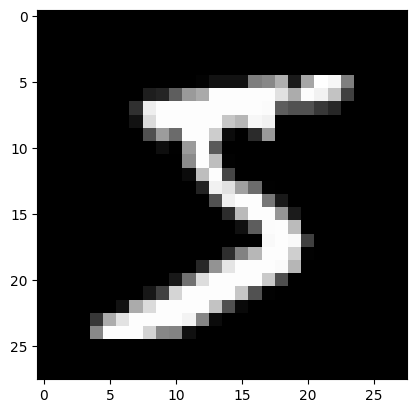

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

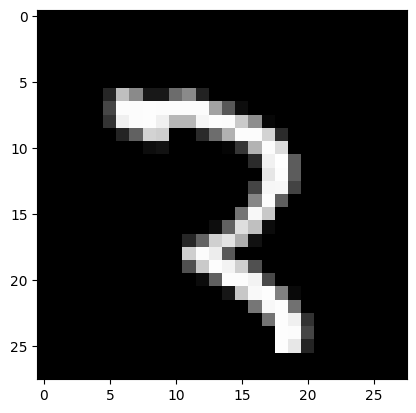

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [55]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
# Write your code here


In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                65568     
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                      

In [57]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [58]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 27s 28ms/step - loss: 0.2937 - accuracy: 0.9134 - val_loss: 0.0971 - val_accuracy: 0.9713
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.0755 - val_accuracy: 0.9747
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0537 - val_accuracy: 0.9826


In [59]:
metrics = pd.DataFrame(model.history.history)

In [60]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.293729,0.913367,0.097074,0.9713
1,0.084760,0.974767,0.075532,0.9747
2,0.060137,0.982200,0.057733,0.9826
3,0.048340,0.985150,0.056873,0.9827
4,0.043480,0.986600,0.053691,0.9826


212221230033 HARIDHARSHINI.S


<Axes: >

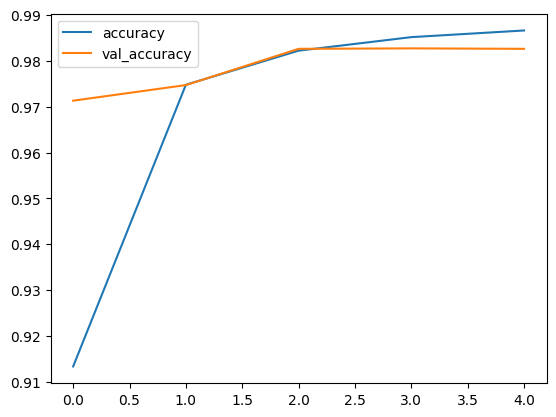

In [61]:
print('212221230033 HARIDHARSHINI.S')
metrics[['accuracy','val_accuracy']].plot()

212221230033 HARIDHARSHINI.S


<Axes: >

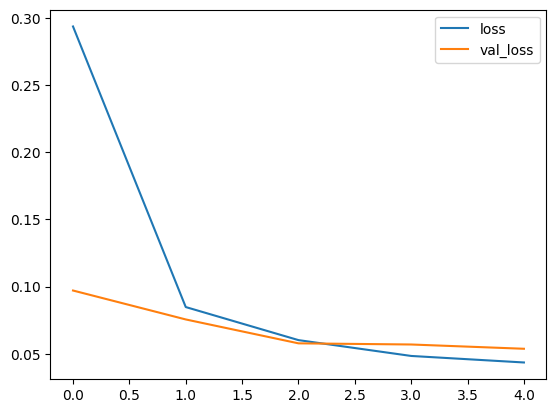

In [62]:
print('212221230033 HARIDHARSHINI.S')
metrics[['loss','val_loss']].plot()

In [63]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [64]:
print('212221230033 HARIDHARSHINI.S')
print(confusion_matrix(y_test,x_test_predictions))

212221230033 HARIDHARSHINI.S
[[ 975    0    1    1    0    1    0    1    1    0]
 [   0 1127    2    2    3    0    0    1    0    0]
 [   1    3 1018    6    1    0    0    3    0    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0   15    0  870    1    2    1    2]
 [   9    3    0    1   10    3  928    0    4    0]
 [   0    2    7    0    0    0    0 1018    1    0]
 [   7    1    6    8    3    1    0    5  936    7]
 [   1    3    1    7   12    3    0   10    2  970]]


In [65]:
print('212221230033 HARIDHARSHINI.S')
print(classification_report(y_test,x_test_predictions))

212221230033 HARIDHARSHINI.S
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [77]:
img = image.load_img('imagethree.png')

In [78]:
type(img)

PIL.Image.Image

In [79]:
img = image.load_img('imagethree.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [80]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 45ms/step


In [81]:
print(x_single_prediction)

[3]


212221230033 HARIDHARSHINI.S


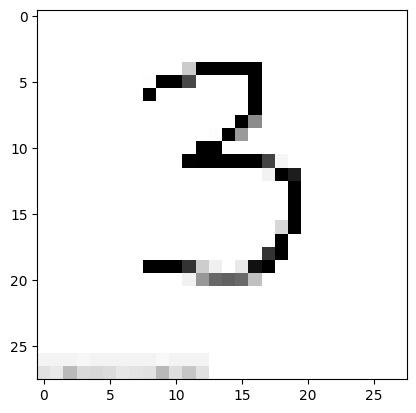

In [82]:
print('212221230033 HARIDHARSHINI.S')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [83]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [84]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [85]:
print('212221230033 HARIDHARSHINI.S')
print(x_single_prediction)

212221230033 HARIDHARSHINI.S
[3]
